In [ ]:
import pandas as pd

data=pd.read_excel(r"C:\Users\sahin\Downloads\power data 2017_15_min.xlsx", sep=';', header=None)
data.columns=['date','pwr']

In [ ]:
data.drop(0,axis=0, inplace=True)

In [ ]:
data.shape

(35040, 2)

In [ ]:
data.head(2)

,date,pwr
1,2018-01-01 00:00:00,2976
2,2018-01-01 00:15:00,2655


In [ ]:
data.tail(4)

,date,pwr
35037,2018-12-31 23:00:00,9959
35038,2018-12-31 23:15:00,10495.5
35039,2018-12-31 23:30:00,11712
35040,2018-12-31 23:45:00,12338.5


In [ ]:
data.dtypes

date    object
pwr     object
dtype: object

In [ ]:
data.drop('date', axis=1, inplace=True)

In [ ]:
data.head(2)

,pwr
1,2976
2,2655


In [ ]:
df=pd.read_excel(r"C:\Users\sahin\Downloads\power data 2018_15_min.xlsx", sep=';')

In [ ]:
df.drop('t_final',axis=1, inplace=True)


In [ ]:
df.tail(2)

,pwr
35038,317.0
35039,317.0


In [ ]:
data=data.append(df,ignore_index=True,sort=True)

In [ ]:
len(data)

70080

In [ ]:
date=pd.date_range(start='2017-01-01 00:00:00', end='2018-12-31 23:45:00',freq='15Min')


In [ ]:
data['date']=date


data = data.reindex(columns=['date','pwr'])
data.head()

,date,pwr
0,2017-01-01 00:00:00,2976
1,2017-01-01 00:15:00,2655
2,2017-01-01 00:30:00,1963
3,2017-01-01 00:45:00,2183
4,2017-01-01 01:00:00,2183


In [ ]:
for i in  range(1,6,1):
    data['t'+str(i)]=data['pwr'].shift(i)

In [ ]:
data.fillna(0.00, inplace=True)

In [ ]:
data.head(2)

,date,pwr,t1,t2,t3,t4,t5
0,2017-01-01 00:00:00,2976.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 00:15:00,2655.0,2976.0,0.0,0.0,0.0,0.0


In [ ]:
data.tail(2)

,date,pwr,t1,t2,t3,t4,t5
70078,2018-12-31 23:30:00,317.0,330.5,265.0,278.0,0.0,0.0
70079,2018-12-31 23:45:00,317.0,317.0,330.5,265.0,278.0,0.0


In [ ]:
x_trainig_data=data[(data['date']>pd.to_datetime('02/01/2017'))&(data['date']<=pd.to_datetime('31/10/2018'))]
x_test_data=data[(data['date']>pd.to_datetime('31/10/2018'))&(data['date']<=pd.to_datetime('30/11/2018'))]
x_validation_data=data[data['date']>pd.to_datetime('30/11/2018')]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib

C:\Users\JUAVILL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


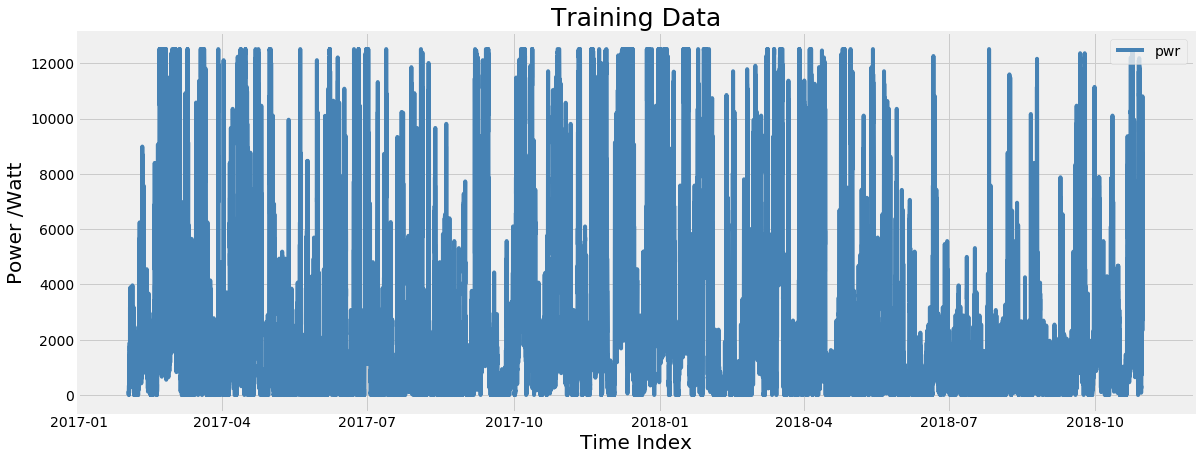

In [ ]:

%matplotlib inline
from pandas.plotting import register_matplotlib_converters
figure(num=None,figsize=(20,7))

plt.style.use('fivethirtyeight')
plt.plot(x_trainig_data['date'],x_trainig_data['pwr'], color='steelblue')
plt.legend()
plt.title('Training Data',fontsize=25)
plt.ylabel('Power /Watt', fontsize=20)
plt.xlabel('Time Index', fontsize=20)
plt.grid(True)
plt.show()

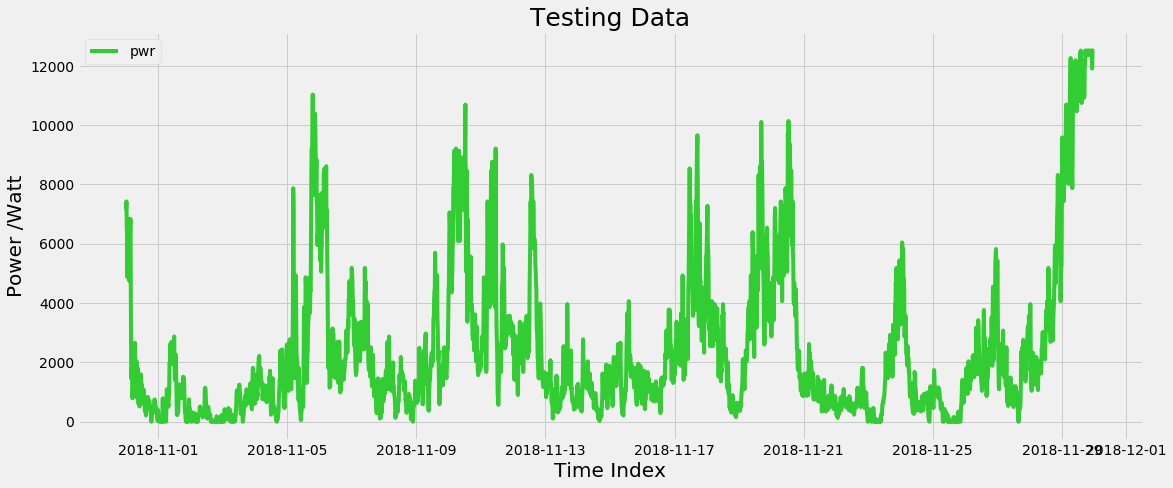

In [ ]:
figure(num=None,figsize=(17,7))
plt.plot(x_test_data['date'],x_test_data['pwr'], color='limegreen')
plt.legend()
plt.title('Testing Data',fontsize=25)
plt.ylabel('Power /Watt', fontsize=20)
plt.xlabel('Time Index', fontsize=20)
plt.grid(True)
plt.show()

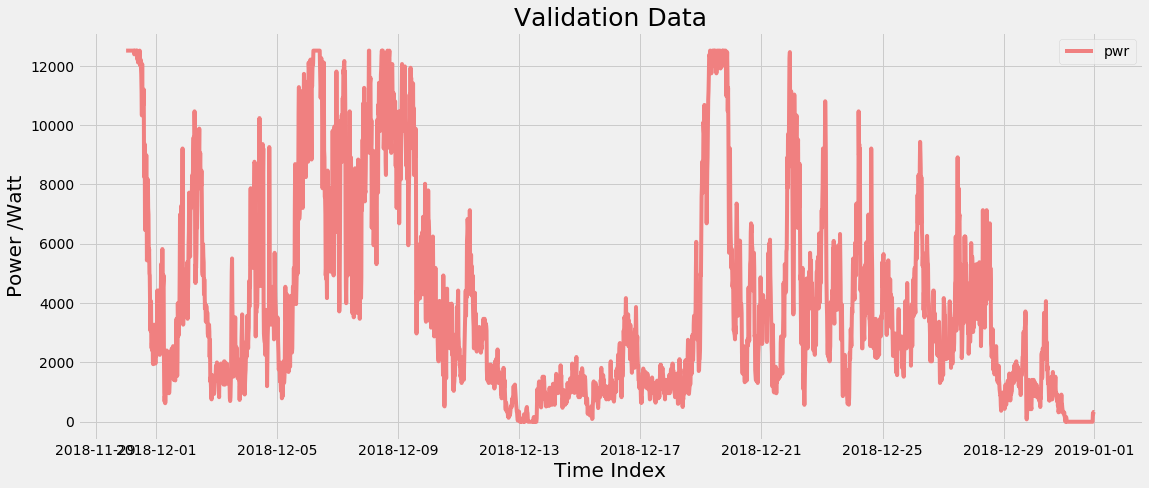

In [ ]:
figure(num=None,figsize=(17,7))
plt.plot(x_validation_data['date'],x_validation_data['pwr'], color='lightcoral')
plt.legend()
plt.title('Validation Data',fontsize=25)
plt.ylabel('Power /Watt', fontsize=20)
plt.xlabel('Time Index', fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
x_train,y_train=x_trainig_data.drop(['date','pwr'], axis=1),x_trainig_data['pwr'].values
x_test,y_test=x_test_data.drop(['date','pwr'], axis=1),x_test_data['pwr'].values
x_valid,y_valid=x_validation_data.drop(['date','pwr'], axis=1),x_validation_data['pwr'].values

In [ ]:
y_train.shape

(61152,)

In [ ]:
y_train=y_train.reshape(61152,1)
y_test=y_test.reshape(2880,1)
y_valid=y_valid.reshape(3071,1)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
x_valid_scaled=scaler.fit_transform(x_valid)


y_valid_scaled=scaler.fit_transform(y_valid)
y_test_scaled=scaler.fit_transform(y_test)
y_train_scaled=scaler.fit_transform(y_train)


x_train_scaled=np.expand_dims(x_train_scaled, axis=1)
x_test_scaled=np.expand_dims(x_test_scaled, axis=1)
x_valid_scaled=np.expand_dims(x_valid_scaled, axis=1)
x_train_scaled.shape

(61152, 1, 5)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,GRU,ELU
from keras.optimizers import adam,RMSprop
from keras.callbacks import TensorBoard,EarlyStopping,ModelCheckpoint
import time
unit=time.time()


directory_2="C:\\Users\\JUAVILL\\Downloads\\tensorboard {}".format(unit)

tensorboard=TensorBoard(log_dir=directory_2)
model_check=ModelCheckpoint(filepath="C:\\Users\\JUAVILL\\Downloads\\model{}".format(unit),monitor='loss',save_best_only=True,
                            save_weights_only=True, verbose=2)

earl_stop=EarlyStopping(monitor='val_loss',patience=5, verbose=1)
print('...Building up a model')
model=Sequential()
model.add(LSTM(824, input_shape=(1,5),dropout=0.1))



model.add(Dense(1, activation='elu'))
#optimizer=RMSprop(lr=0.001)
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])


...Building up a model


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 824)               2735680   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 825       
Total params: 2,736,505
Trainable params: 2,736,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history=model.fit(x_train_scaled, y_train_scaled, 
                      validation_data=(x_valid_scaled,y_valid_scaled),
                      callbacks=[tensorboard,model_check,earl_stop],epochs=10, batch_size=96, verbose=1)

Train on 61152 samples, validate on 3071 samples
Epoch 1/10
61152/61152 [==============================] - 119s 2ms/step - loss: 0.1031 - acc: 0.0000e+00 - val_loss: 0.0780 - val_acc: 0.0000e+00

Epoch 00001: loss improved from inf to 0.10310, saving model to C:\Users\JUAVILL\Downloads\model1568573536.7677364
Epoch 2/10
61152/61152 [==============================] - 116s 2ms/step - loss: 0.0744 - acc: 0.0000e+00 - val_loss: 0.0735 - val_acc: 0.0000e+00

Epoch 00002: loss improved from 0.10310 to 0.07435, saving model to C:\Users\JUAVILL\Downloads\model1568573536.7677364
Epoch 3/10
61152/61152 [==============================] - 119s 2ms/step - loss: 0.0682 - acc: 0.0000e+00 - val_loss: 0.0732 - val_acc: 0.0000e+00

Epoch 00003: loss improved from 0.07435 to 0.06822, saving model to C:\Users\JUAVILL\Downloads\model1568573536.7677364
Epoch 4/10
61152/61152 [==============================] - 123s 2ms/step - loss: 0.0667 - acc: 0.0000e+00 - val_loss: 0.0720 - val_acc: 0.0000e+00

Epoch 0000

In [ ]:
print(history)

NameError: name 'history' is not defined

In [ ]:

figure(num=None, figsize=(13,7))
plt.plot(history.history['loss'], linewidth=2.5, label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.grid(True)


plt.show()

NameError: name 'history' is not defined

<Figure size 936x504 with 0 Axes>

In [ ]:

x_forecast=data[(data['date']>pd.to_datetime('30/12/2017'))&(data['date']<=pd.to_datetime('31/12/2018'))]
x_train=x_forecast.drop(['date','pwr'], axis=1)
x_train_scaled=scaler.fit_transform(x_train)

In [ ]:
y_pre=model.predict(x_test_scaled)

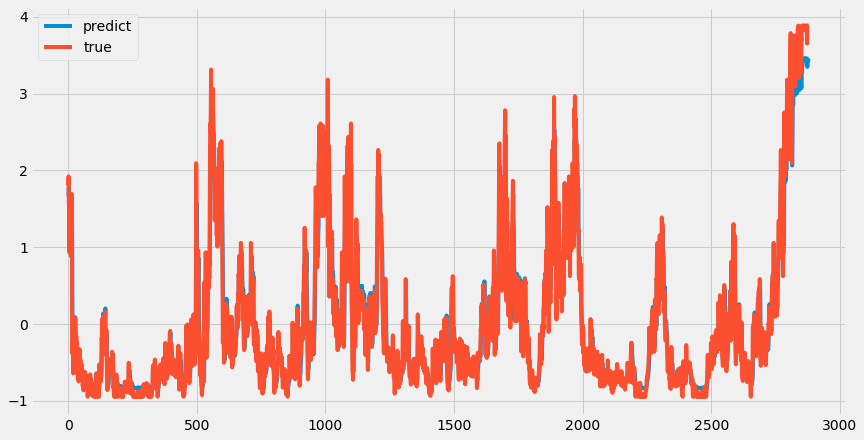

In [ ]:
figure(num=None, figsize=(13,7))
plt.plot(y_pre,label='predict',linewidth=4)
plt.plot(y_test_scaled,label='true')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_new_inverse = scaler.inverse_transform(y_pre)


In [ ]:
y_new_inverse

array([[ 7942.4478],
       [ 7910.6665],
       [ 8249.485 ],
       ...,
       [13617.73  ],
       [13637.068 ],
       [13682.999 ]], dtype=float32)

In [ ]:
deneme=pd.date_range(start='2017-01-01 00:00:00', end='2017-01-01 23:45:00',freq='15min')

In [ ]:
data[35040:35040+96]

,date,pwr,t1,t2,t3,t4,t5
35040,2018-01-01 00:00:00,12514.0,12338.5,11712.0,10495.5,9959.0,7951.0
35041,2018-01-01 00:15:00,12489.0,12514.0,12338.5,11712.0,10495.5,9959.0
35042,2018-01-01 00:30:00,12514.0,12489.0,12514.0,12338.5,11712.0,10495.5
35043,2018-01-01 00:45:00,12388.5,12514.0,12489.0,12514.0,12338.5,11712.0
35044,2018-01-01 01:00:00,12112.0,12388.5,12514.0,12489.0,12514.0,12338.5
35045,2018-01-01 01:15:00,11164.0,12112.0,12388.5,12514.0,12489.0,12514.0
35046,2018-01-01 01:30:00,9810.0,11164.0,12112.0,12388.5,12514.0,12489.0
35047,2018-01-01 01:45:00,7282.0,9810.0,11164.0,12112.0,12388.5,12514.0
35048,2018-01-01 02:00:00,6394.0,7282.0,9810.0,11164.0,12112.0,12388.5
35049,2018-01-01 02:15:00,6035.0,6394.0,7282.0,9810.0,11164.0,12112.0


In [ ]:
35040/96


365.0

In [ ]:
teta=data.drop(['date','pwr'])

,date,pwr,t1,t2,t3,t4,t5
0,2017-01-01 00:00:00,2976.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 00:15:00,2655.0,2976.0,0.0,0.0,0.0,0.0


In [ ]:
seq_length=96
for i in range(2):
    y=data[35040+(i*96):3040+(i+1)*96]
    print(y)

Empty DataFrame
Columns: [date, pwr, t1, t2, t3, t4, t5]
Index: []
Empty DataFrame
Columns: [date, pwr, t1, t2, t3, t4, t5]
Index: []


In [ ]:
y

,date,pwr,t1,t2,t3,t4,t5
